<a href="https://colab.research.google.com/github/amimulhasan/python/blob/main/Westheimer%E2%80%99s_Saccadic_Eye_Movement_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

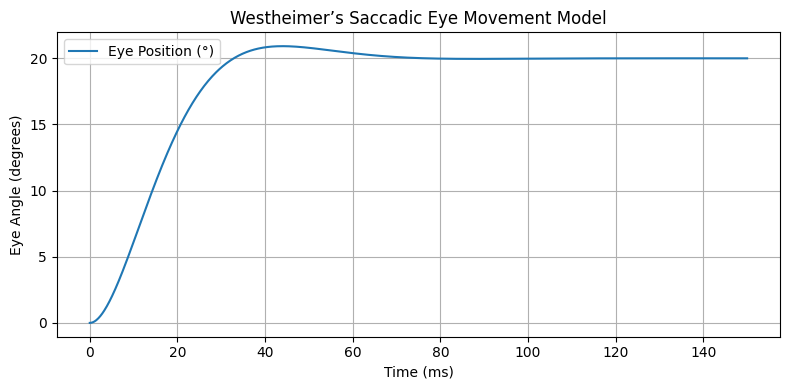

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step

# --- Parameters (based on Westheimer 1954) ---
K = 1.0       # Stiffness (Nm/rad)
J = 1e-4      # Moment of inertia (kg.m^2)
zeta = 0.7    # Damping ratio
omega_n = np.sqrt(K / J)  # Natural frequency

B = 2 * zeta * np.sqrt(K * J)  # Damping coefficient

# Transfer function: H(s) = K / (J*s^2 + B*s + K)
numerator = [K]
denominator = [J, B, K]
system = lti(numerator, denominator)

# Simulate step response (20° saccade = 20*pi/180 rad)
saccade_amplitude_rad = 20 * np.pi / 180
t = np.linspace(0, 0.15, 1000)  # 0 to 150 ms
t, theta = step(system, T=t)
theta = theta * saccade_amplitude_rad  # scale to desired angle

# Plot result
plt.figure(figsize=(8, 4))
plt.plot(t * 1000, theta * 180 / np.pi, label="Eye Position (°)")
plt.xlabel("Time (ms)")
plt.ylabel("Eye Angle (degrees)")
plt.title("Westheimer’s Saccadic Eye Movement Model")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
